In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the data
import chardet

with open('SeoulBikeData.csv', 'rb') as f:
    data = f.read(100)

result = chardet.detect(data)
encoding = result['encoding']

print(encoding)

df = pd.read_csv("SeoulBikeData.csv" , encoding=encoding)

ISO-8859-9


In [3]:
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [4]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
type(df['Date'])

pandas.core.series.Series

In [6]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

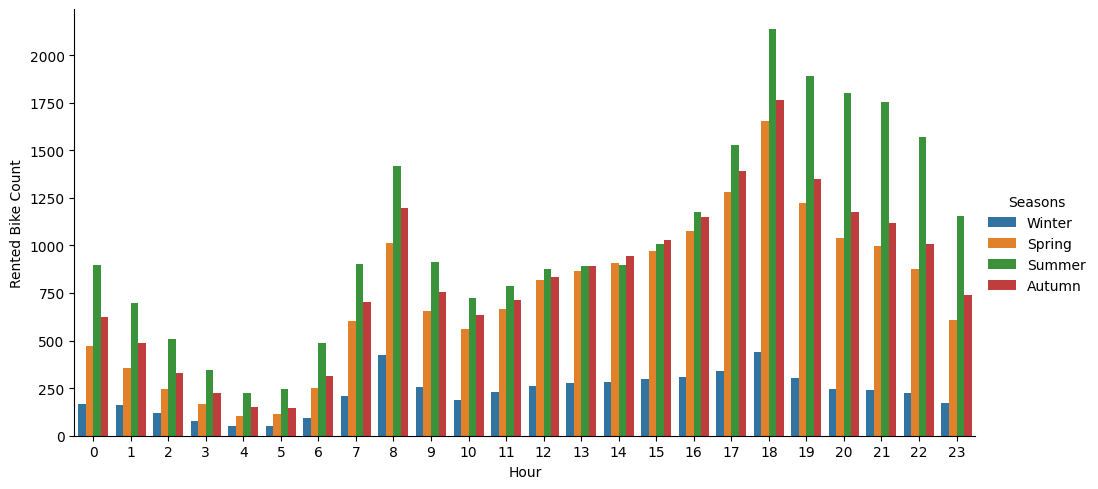

In [7]:
sns.catplot(data=df, x = 'Hour', y = 'Rented Bike Count',
            hue = 'Seasons',  kind='bar', height=5, errorbar=None,
    aspect=2)

Winter has the minimum number of rented bikes and summer is the highes. From morining to evening almost every hour rented number of bikes for almost every season.

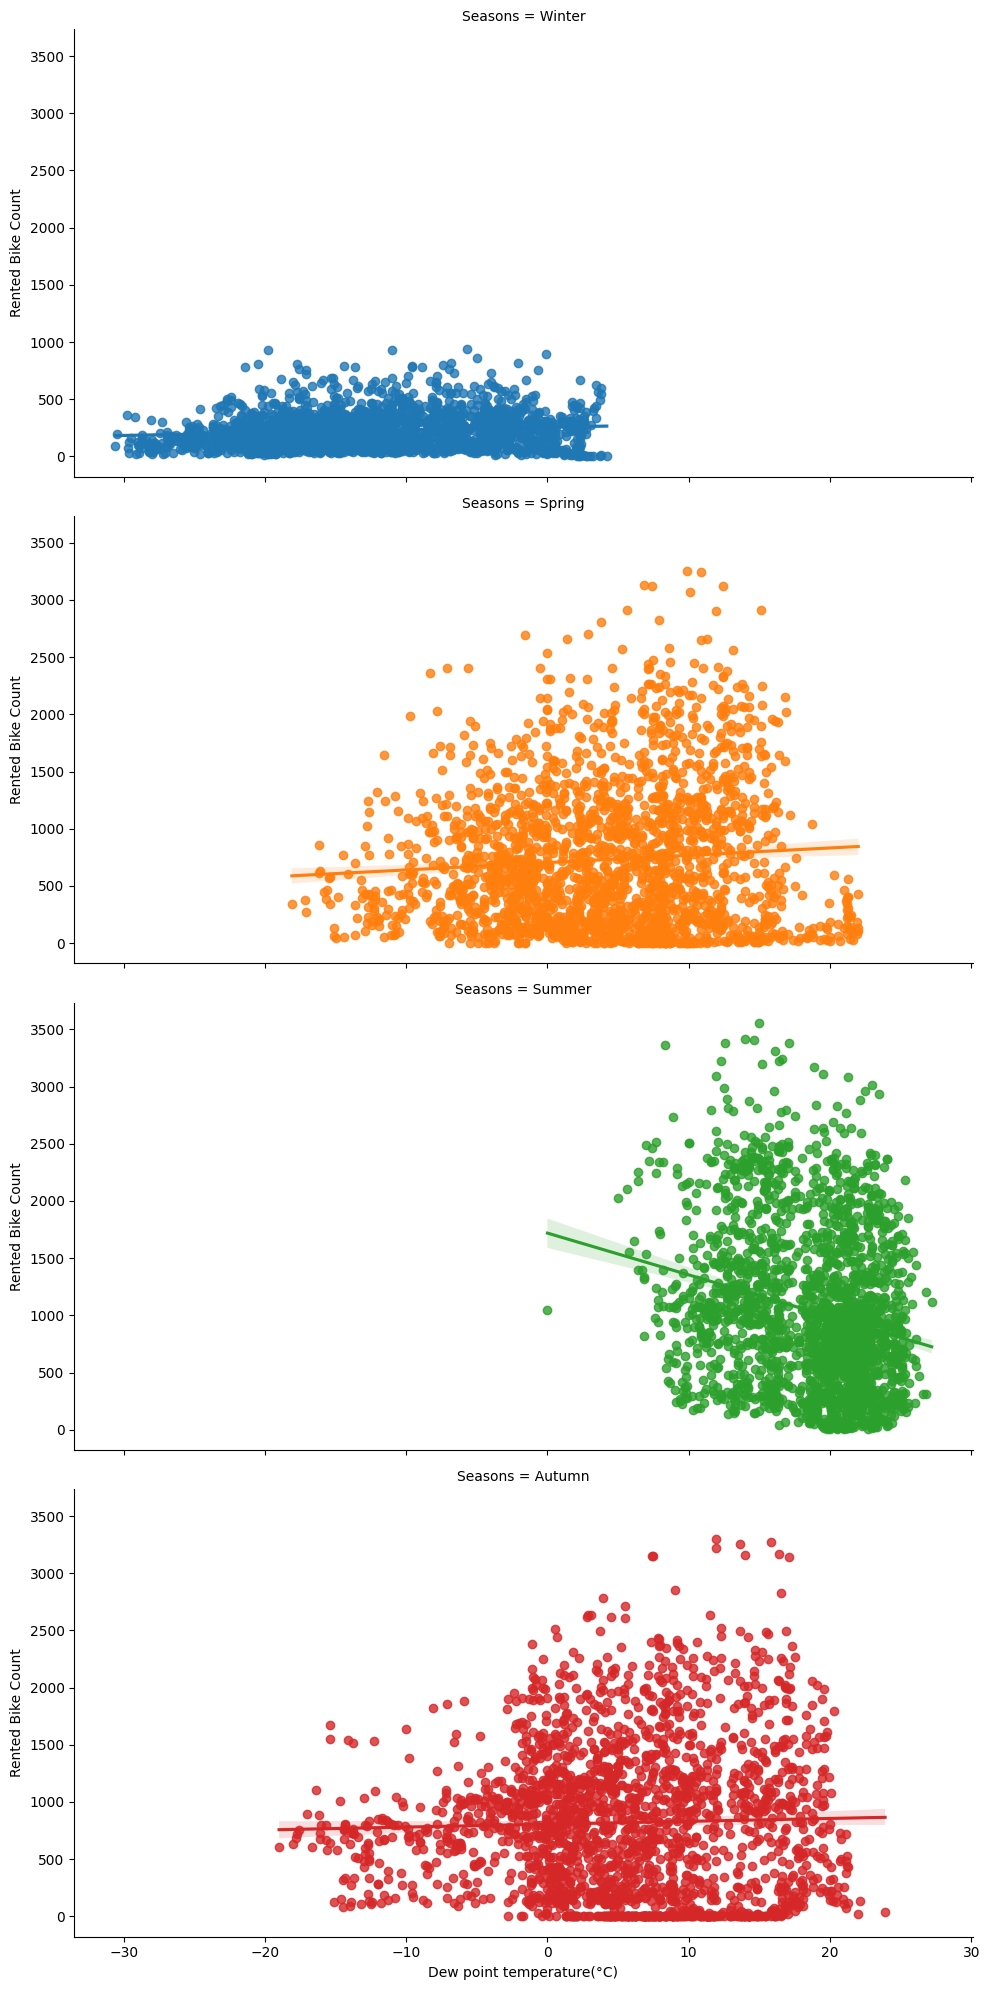

In [8]:
sns.lmplot(data = df, x = 'Dew point temperature(°C)', y = 'Rented Bike Count',
           hue = 'Seasons', aspect = 2, row = 'Seasons')

Only in Summer number decreses as the temp. increses.

In [9]:
df.corr(numeric_only=True)['Rented Bike Count'].sort_values()

Humidity(%)                 -0.199780
Snowfall (cm)               -0.141804
Rainfall(mm)                -0.123074
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Solar Radiation (MJ/m2)      0.261837
Dew point temperature(°C)    0.379788
Hour                         0.410257
Temperature(°C)              0.538558
Rented Bike Count            1.000000
Name: Rented Bike Count, dtype: float64

Temperature has the strongest relation with our output.

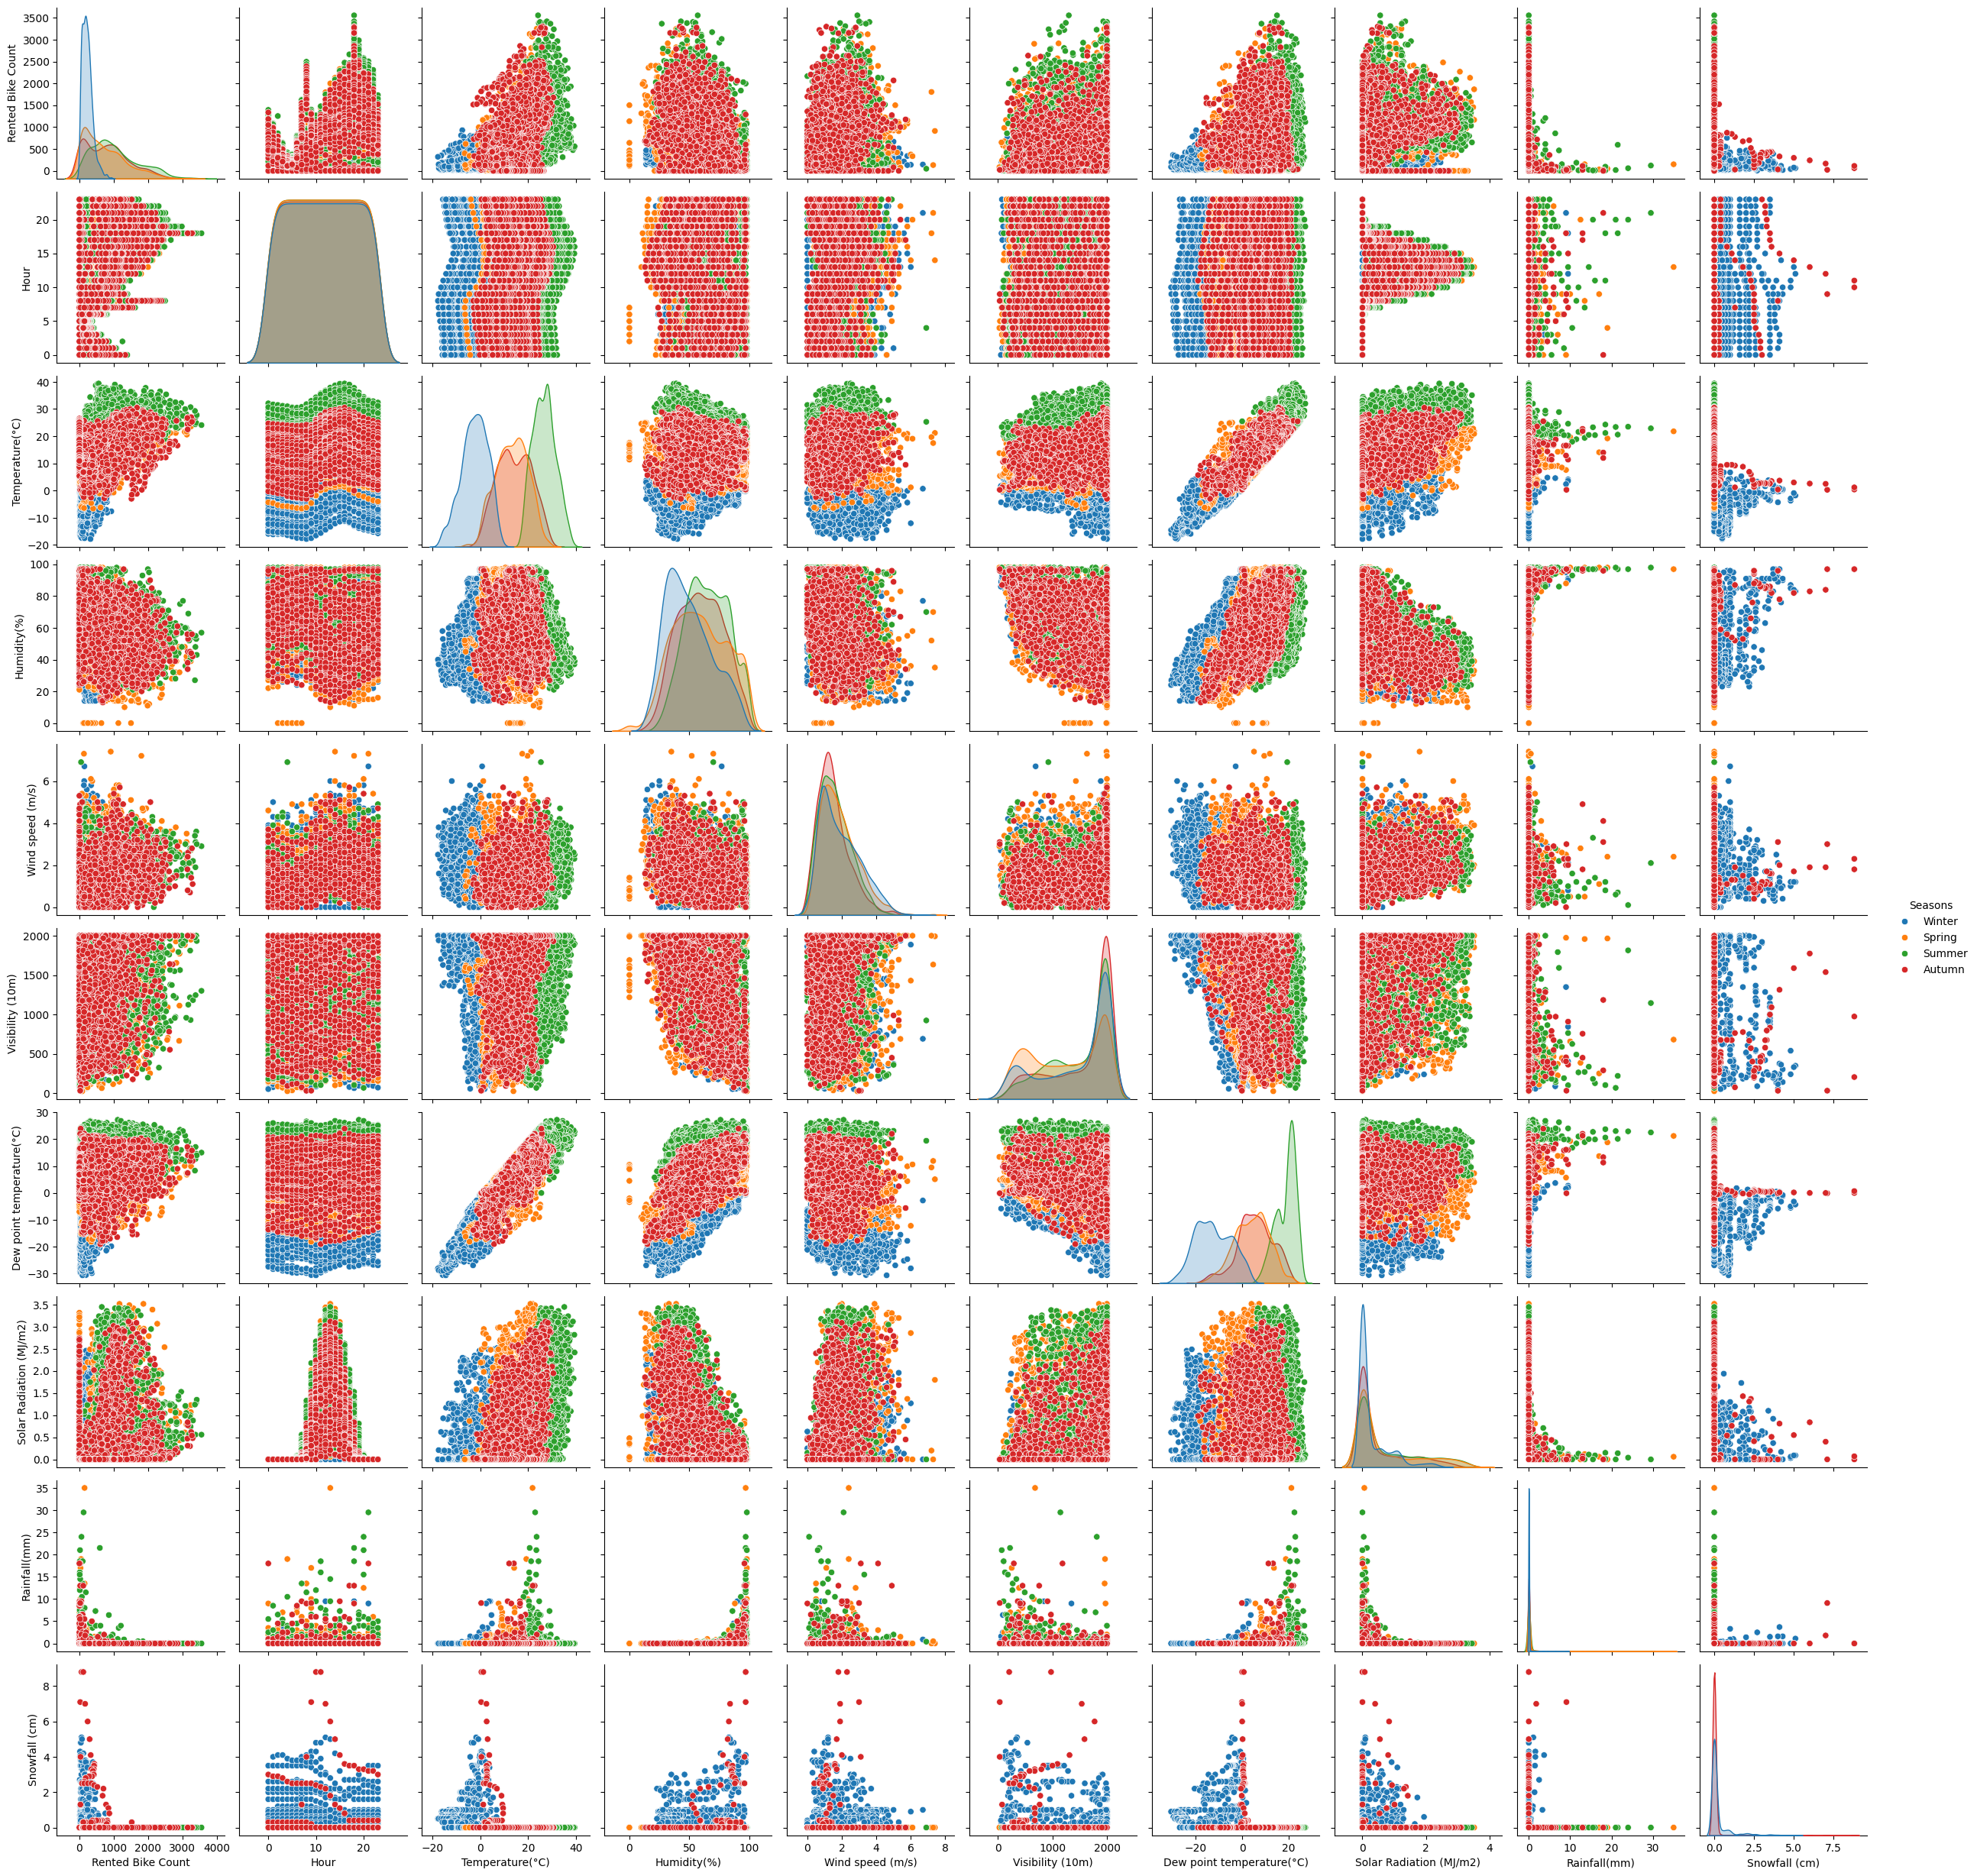

In [10]:
sns.pairplot(data=df, hue='Seasons')

In [11]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [12]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [13]:
df = df.drop(labels=['Date'], axis=1)

In [14]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  
0           0.0            0.0  Winter  No Holiday             Yes  
1           0.0            0.0  Winter  No Holiday             Yes  
2           0.0            0.0  Winter  No Holiday             Yes  
3           0.0            0.0  Winter  No Holiday             Yes  
4           0.0            0.0  Winter  No Holiday             Yes

In [15]:
print(df['Seasons'].unique())

['Winter' 'Spring' 'Summer' 'Autumn']


In [16]:
print(df['Holiday'].unique())

['No Holiday' 'Holiday']


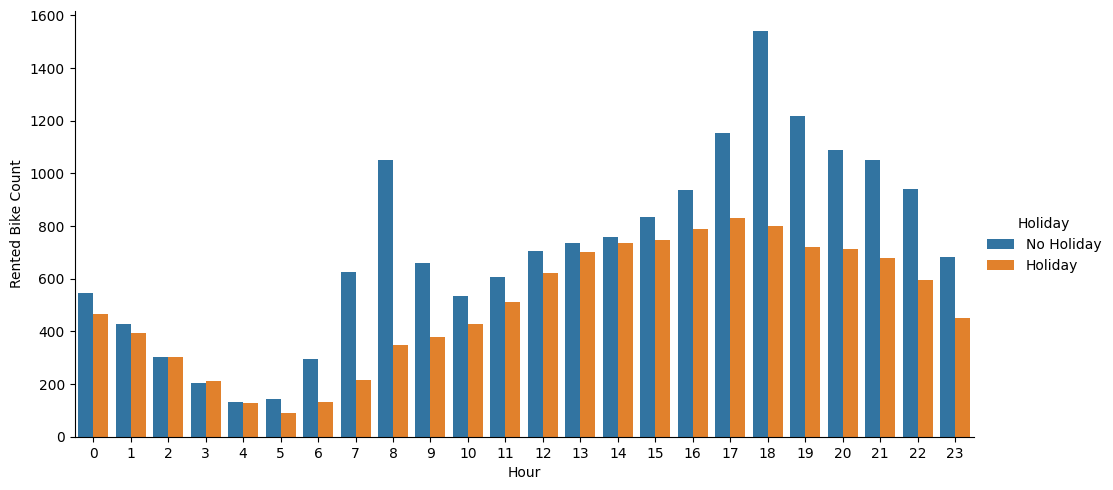

In [17]:
sns.catplot(data=df, x = 'Hour', y = 'Rented Bike Count',
            hue = 'Holiday',  kind='bar', height=5, errorbar=None,
    aspect=2)

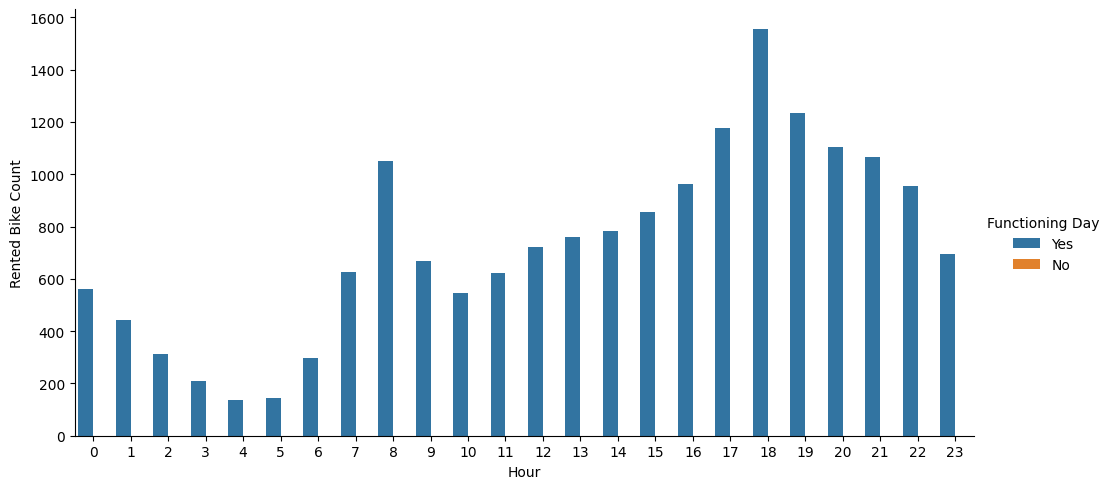

In [18]:
sns.catplot(data=df, x = 'Hour', y = 'Rented Bike Count',
            hue = 'Functioning Day',  kind='bar', height=5, errorbar=None,
    aspect=2)

In [19]:
print(df['Functioning Day'].unique())

['Yes' 'No']


In [20]:
season_dummies = pd.get_dummies(df['Seasons'], drop_first=True)

In [21]:
df = pd.concat([df , season_dummies], axis=1)

In [22]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Spring  \
0           0.0            0.0  Winter  No Holiday             Yes   False   
1           0.0            0.0  Winter  No Holiday             Yes   False   
2           0.0            0.0  Winter  No Holiday             Yes   False   
3           0.0            0.0  Winter  No Holiday             Yes   False   
4           0.0            0.0  Winter  No Holiday             Yes   False   

   Summer  Winter  
0   False    True  
1   False    True  
2   False    True  
3   False    True  
4   False    True

In [23]:
df.drop('Seasons', axis=1)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm)     Holiday Functioning Day  Spring  Summer  \
0              0.0            0.0  No Holiday             Yes   False   False   
1              0.0            0.0  No Holiday             Yes   False   False   
2              0.0            0.0  No Holiday             Yes   False   False   
3              0.0            0.0  No Holiday             Yes   False   False   
4              0.0            0.0  No Holiday             Yes   False   False   
...            ...            ...         ...             ...     ...     ...   
8755           0.0            0.0  No Holiday             Yes   False   False   
8756           0.0            0.0  No Holiday             Yes   False   False   
8757           0.0            0.0  No Holiday             Yes   False   False   
8758           0.0            0.0  No Holiday             Yes   False   False   
8759           0.0            0.0  No Holiday             Yes   False   False   

      Winter  
0       True  
1       True  
2       True  
3       True  
4       True  
...      ...  
8755   False  
8756   False  
8757   False  
8758   False  
8759   False  

[8760 rows x 15 columns]

In [24]:
print(df['Holiday'].unique())
print(df['Functioning Day'].unique())

['No Holiday' 'Holiday']
['Yes' 'No']


In [25]:
df['Holiday'] = df['Holiday'].map({'Holiday':1, 'No Holiday':0})
df['Functioning Day'] = df['Functioning Day'].map({'Yes':1, 'No':0})

In [26]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons  Holiday  Functioning Day  Spring  \
0           0.0            0.0  Winter        0                1   False   
1           0.0            0.0  Winter        0                1   False   
2           0.0            0.0  Winter        0                1   False   
3           0.0            0.0  Winter        0                1   False   
4           0.0            0.0  Winter        0                1   False   

   Summer  Winter  
0   False    True  
1   False    True  
2   False    True  
3   False    True  
4   False    True

In [27]:
df = df.drop('Seasons', axis=1)

Here we are predicting a number so we will use three algorithms. Linear regression, Random Forest

In [28]:
y = df['Rented Bike Count']
X = df.drop('Rented Bike Count', axis = 1)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [31]:
X_train.shape

(6132, 14)

In [32]:
y_train.shape

(6132,)

In [33]:
X_test.shape

(2628, 14)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm = LinearRegression()

In [36]:
lm.fit(X_train, y_train)

LinearRegression()

In [37]:
predications = lm.predict(X_test)

In [38]:
print(predications)

[ 952.90714603 1154.65672013 1361.63938082 ... 1172.74273327  477.17855342
  658.69734754]


In [39]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R² Score:", r2_score(y_test, predications))
print("MAE:", mean_absolute_error(y_test, predications))
print("MSE:", mean_squared_error(y_test, predications))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predications)))

R² Score: 0.5350347910907087
MAE: 327.47162303516257
MSE: 190538.14238227488
RMSE: 436.50674952659654


let us try Decision Tree 

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
dm = DecisionTreeRegressor()

In [42]:
dm.fit(X_train, y_train)

DecisionTreeRegressor()

In [43]:
predications = dm.predict(X_test)

In [44]:
print("R² Score:", r2_score(y_test, predications))
print("MAE:", mean_absolute_error(y_test, predications))
print("MSE:", mean_squared_error(y_test, predications))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predications)))

R² Score: 0.7243517162503579
MAE: 190.78120243531203
MSE: 112957.9394977169
RMSE: 336.0921592327273


Let us try Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rm = RandomForestRegressor(n_estimators=100, random_state=42)

In [47]:
rm.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [48]:
predications = rm.predict(X_test)

In [49]:
print("R² Score:", r2_score(y_test, predications))
print("MAE:", mean_absolute_error(y_test, predications))
print("MSE:", mean_squared_error(y_test, predications))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predications)))

R² Score: 0.8597510759787573
MAE: 144.88255327245054
MSE: 57472.621482382034
RMSE: 239.73448121282436


In [50]:
print(df['Rented Bike Count'].mean())

704.6020547945205


Random Forest is working best

#### Random Forest is R² Score: 0.85 which is very good compared to our linear refression. So Random Forest is working best model